# Regression Basics to Reality

It's not so simple in the real world

## Webinar Outcomes
* How to deal with catergorical data
* Imputation using hypothesis testing

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Multivariable Regression

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Housing_Price_Data.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<ipython-input-330-f65fb0cde226>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=encoded_data,


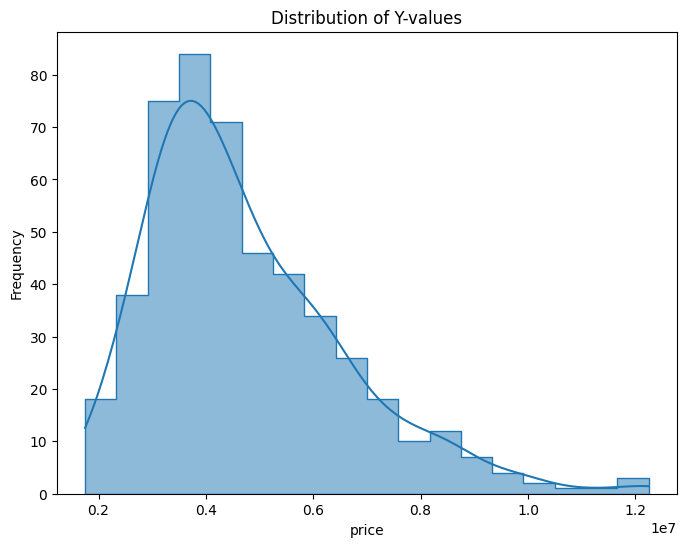

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=encoded_data,
             x='price',
             element='step',
             kde=True,
             palette='tab10')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of Y-values')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Build and test a basic model

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
X = df.drop(columns=['price','mainroad','guestroom',
                     'basement', 'hotwaterheating', 'airconditioning',
                     'prefarea', 'furnishingstatus'])
y = df['price']  # Target variable

In [ ]:
X.head(2)

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
# Initialise
model = LinearRegression()
#Train
model.fit(X_train, y_train)
#Predict
y_pred = model.predict(X_test)
#Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse" , mse, "R-Squared", r2)

mse 1173790361911.6228 R-Squared 0.5926486342834361


#### This is known as the baseline model

In [ ]:
missing_percentage = 0.1
num_missing_values = int(len(df['area']) * missing_percentage)
missing_indices = np.random.choice(len(df['area']), num_missing_values, replace=False)
df['area'][missing_indices] = np.nan

<ipython-input-274-828ce2459c6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'][missing_indices] = np.nan


In [ ]:
num_missing_values = int(len(df['furnishingstatus']) * missing_percentage)
missing_indices = np.random.choice(len(df['furnishingstatus']), num_missing_values, replace=False)
df['furnishingstatus'][missing_indices] = np.nan

<ipython-input-275-0b8892901155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishingstatus'][missing_indices] = np.nan


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
price                0
area                54
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishingstatus    54
dtype: int64


Encoding

Encoding methods are used to convert categorical data into numerical format, which is often required for machine learning algorithms to process the data. Here are some common types of encoding methods along with examples:

1. **Label Encoding:**
   Assigns a unique integer to each category.

* **When to Use:** Label encoding is useful when the categorical variable is ordinal, meaning it has a natural order or hierarchy.
* **Why Use:** It assigns unique integer labels to each category, preserving the ordinal relationship between the categories. Some algorithms can exploit this ordinal relationship.

2. **One-Hot Encoding:**
Creates binary columns for each category, representing the presence or absence of the category.

* **When to Use:** One-hot encoding is typically used when the categorical variable is nominal, meaning it has no inherent order or hierarchy.
* **Why Use:** It creates binary columns for each category, which helps prevent the model from interpreting ordinality where none exists. One-hot encoding is widely used and compatible with many machine learning algorithms.


In [ ]:
data = pd.DataFrame({'category': ['A', 'B', 'C', 'A', 'B'],
                     'numeric': [1,2,3,4,5]})
data.head()

,category,numeric
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5


**Label encoder**

In [ ]:
# Import
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
data['label_encoded'] = label_encoder.fit_transform(data['category'])
data.head()

,category,numeric,label_encoded
0,A,1,0
1,B,2,1
2,C,3,2
3,A,4,0
4,B,5,1


**Get Dummies**

Note this will alter the dataframe and create a new dataframe

In [ ]:
dummies = pd.get_dummies(data, columns=['category'])

# This is to join the two df to see the result
final_data = pd.concat([data, dummies], axis=1)
final_data.head()

,category,numeric,label_encoded,numeric,label_encoded,category_A,category_B,category_C
0,A,1,0,1,0,1,0,0
1,B,2,1,2,1,0,1,0
2,C,3,2,3,2,0,0,1
3,A,4,0,4,0,1,0,0
4,B,5,1,5,1,0,1,0


### Rules

* If want to ensure the model observes ordinality (rank) we use `LabelEncoder`

* If want no bias we use `get_dummies`

Let's implement both Label encoder and get dummies on the dataset

In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,NaN,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished


Which column should we encode or dummy?

Encode:
* mainroad
* furnishingstatus

Dummies:
* guestroom
* prefarea

One Hot Encoding - Get_Dummies implementation

In [ ]:
encoded_data = pd.get_dummies(df, columns=['guestroom', 'prefarea'])
encoded_data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes
0,13300000,NaN,4,2,3,yes,no,no,yes,2,furnished,1,0,0,1
1,12250000,8960.0,4,4,4,yes,no,no,yes,3,furnished,1,0,1,0


### Encoding - Label Encoding

In [ ]:
#Test the spread
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
# Calculate the mean of 'value' for each category
means = df.groupby('mainroad')['price'].mean()
print(means)

mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64


#### Boxplot

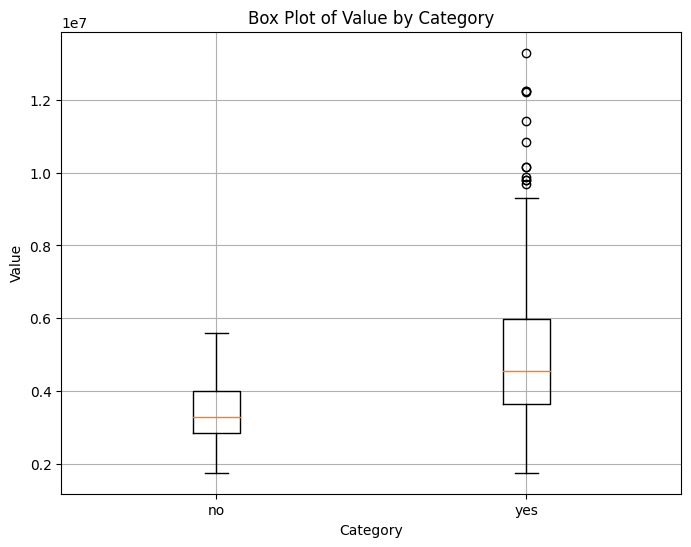

In [ ]:
grouped_data = df.groupby('mainroad')['price'].apply(list).to_dict()

# Extract categories and values
categories = list(grouped_data.keys())
values = list(grouped_data.values())

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(values, labels=categories)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Box Plot of Value by Category')
plt.grid(True)
plt.show()

In [ ]:
# The difference between the value
mean_diff_percentage = ((means['yes'] - means['no']) / means['no']) * 100

print(mean_diff_percentage)

46.864298844034295


In [ ]:
# Define custom mapping
custom_mapping = {'yes': 1.5, 'no': 0}

# Apply custom mapping using map() function
encoded_data['category_mapped'] = encoded_data['mainroad'].map(custom_mapping)

# Optionally, use LabelEncoder to transform mapped labels into numeric values
label_encoder = LabelEncoder()
encoded_data['category_encoded'] = label_encoder.fit_transform(encoded_data['category_mapped'])

In [ ]:
encoded_data[encoded_data['mainroad'] == 'no']

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes,category_mapped,category_encoded
143,5600000,NaN,5,2,3,no,yes,yes,no,0,unfurnished,1,0,1,0,0.0,0
157,5495000,2817.0,4,2,2,no,yes,no,no,1,furnished,0,1,1,0,0.0,0
169,5250000,NaN,4,2,2,no,no,no,yes,0,NaN,1,0,1,0,0.0,0
180,5215000,4500.0,4,2,1,no,yes,no,yes,2,semi-furnished,1,0,1,0,0.0,0
182,5145000,3410.0,3,1,2,no,no,no,yes,0,NaN,1,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2135000,NaN,2,1,1,no,no,no,no,0,unfurnished,1,0,1,0,0.0,0
536,1960000,3420.0,5,1,2,no,no,no,no,0,NaN,1,0,1,0,0.0,0
539,1855000,2990.0,2,1,1,no,no,no,no,1,unfurnished,1,0,1,0,0.0,0
541,1767150,2400.0,3,1,1,no,no,no,no,0,semi-furnished,1,0,1,0,0.0,0


In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              491 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   basement          545 non-null    object 
 7   hotwaterheating   545 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  furnishingstatus  491 non-null    object 
 11  guestroom_no      545 non-null    uint8  
 12  guestroom_yes     545 non-null    uint8  
 13  prefarea_no       545 non-null    uint8  
 14  prefarea_yes      545 non-null    uint8  
 15  category_mapped   545 non-null    float64
 16  category_encoded  545 non-null    int64  
dt

### Disclaimer

We cannot encode `furnishingstatus` until we deal with missing values.

Let's deal with that beast. Rememeber you can always just drop missing values. But there are consequences

In [ ]:
print(df.isnull().sum())

price                0
area                54
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishingstatus    54
dtype: int64


In [ ]:
drop_na_df = df.dropna()

In [ ]:
X = drop_na_df.drop(columns=['price','mainroad','guestroom',
                     'basement', 'hotwaterheating', 'airconditioning',
                     'prefarea', 'furnishingstatus'])
y = drop_na_df['price']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
# Initialise
model = LinearRegression()
#Train
model.fit(X_train, y_train)
#Predict
y_pred = model.predict(X_test)
#Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse" , mse, "R-Squared", r2)

mse 1867051951699.1194 R-Squared 0.496588895172573


This is the mse with all data so sometimes not all data is valuable
* mse 1173790361911.6228
* R-Squared 0.5926486342834361

# Hypothesis testing
Can be used for data imputation in Python by leveraging statistical tests to make educated guesses about the missing values based on the available data. Here's a general approach to using hypothesis testing for data imputation:

1. Identify the Missing Data: First, identify the missing values in your dataset.

2. Understand the Data Distribution: Before performing hypothesis testing, it's crucial to understand the distribution of your data. Depending on the nature of your data (e.g., continuous, categorical), you may need to choose different hypothesis tests.

3. Choose a Hypothesis Test: Based on the nature of your data, choose an appropriate hypothesis test. Some common tests include:

* For continuous data: t-test, ANOVA, Kolmogorov-Smirnov test, etc.
* For categorical data: Chi-square test, Fisher's exact test, etc.
4. Perform Hypothesis Test: For each missing value, perform the chosen hypothesis test using the available data to make an educated guess about the missing value.

5. Impute Missing Values: Based on the results of the hypothesis test, impute the missing values with the inferred values.

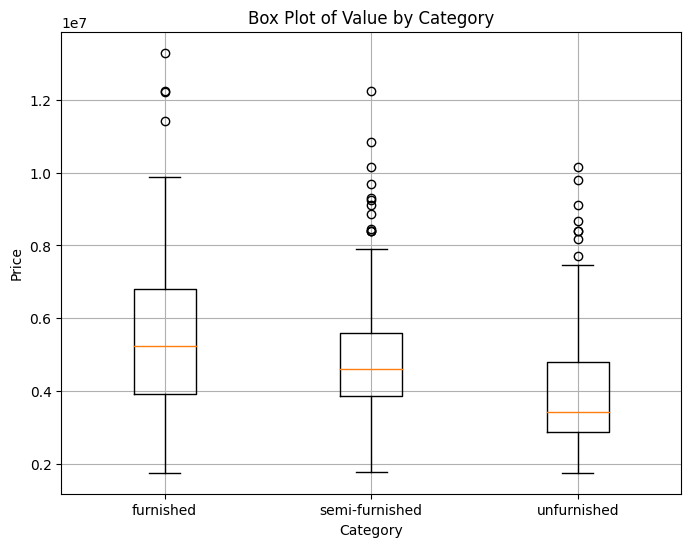

In [ ]:
grouped_data = encoded_data.groupby('furnishingstatus')['price'].apply(list).to_dict()

# Extract categories and values
categories = list(grouped_data.keys())
values = list(grouped_data.values())

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(values, labels=categories)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Box Plot of Value by Category')
plt.grid(True)
plt.show()

In [ ]:
# The difference between the value
means = encoded_data.groupby('furnishingstatus')['price'].mean()
print(means)

mean_diff_percentage = ((means['furnished'] - means['unfurnished']) / means['unfurnished']) * 100

print(mean_diff_percentage)

furnishingstatus
furnished         5.603552e+06
semi-furnished    4.917399e+06
unfurnished       4.005247e+06
Name: price, dtype: float64
39.90528200546617


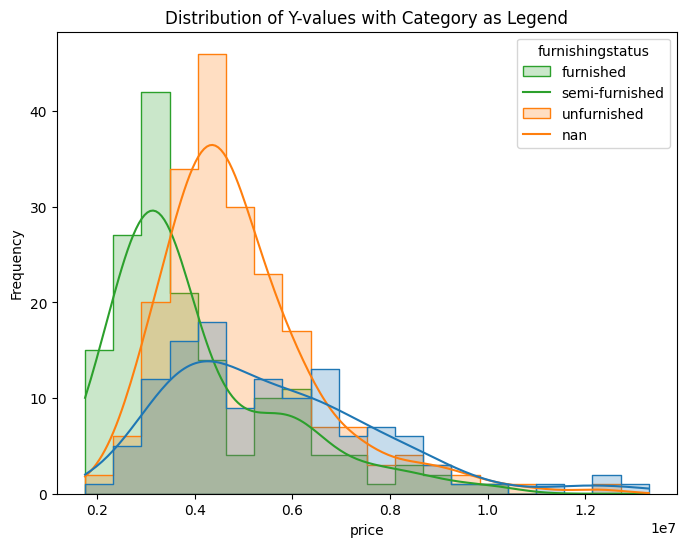

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=encoded_data,
             x='price',
             hue='furnishingstatus',
             element='step',
             kde=True,
             palette='tab10')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of Y-values with Category as Legend')
plt.legend(title='furnishingstatus', labels=encoded_data['furnishingstatus'].unique())
plt.show()

#### Observation

Imputation of the mean is directly link to the furniture status

Let's use stats to prove that

In [ ]:
from scipy import stats

# Group data by furnishing status
furnished = encoded_data[encoded_data['furnishingstatus'] == "furnished"]
unfurnished = encoded_data[encoded_data['furnishingstatus'] != "furnished"]

# Perform a two-tailed t-test (assuming equal variances)
t_statistic, p_value = stats.ttest_ind(furnished['price'], unfurnished['price'])
print(t_statistic)
print(p_value)

# Hypothesis testing at a 5% significance level (alpha = 0.05)
if p_value < 0.05:
  print("There is a statistically significant difference (p-value =", p_value, ") between furnished and unfurnished property prices.")
else:
  print("There is not a statistically significant difference (p-value =", p_value, ") between furnished and unfurnished property prices.")

5.838187370487102
9.087995775937727e-09
There is a statistically significant difference (p-value = 9.087995775937727e-09 ) between furnished and unfurnished property prices.


### Observation

Now that we confirmed this we need to input properties above a certain value with the furnished status

In [ ]:
print(means)

furnishingstatus
furnished         5.603552e+06
semi-furnished    4.917399e+06
unfurnished       4.005247e+06
Name: price, dtype: float64


In [ ]:
encoded_data[encoded_data['furnishingstatus'].isnull()]

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes,category_mapped,category_encoded
20,8750000,4320.0,3,1,2,yes,yes,yes,no,2,NaN,1,0,1,0,1.5,1
38,7962500,6000.0,3,1,4,yes,no,no,yes,2,NaN,0,1,1,0,1.5,1
63,7035000,6360.0,4,2,3,yes,no,no,yes,2,NaN,1,0,0,1,1.5,1
67,6895000,7700.0,3,2,1,yes,no,no,no,2,NaN,1,0,1,0,1.5,1
73,6685000,6600.0,2,2,4,yes,yes,no,no,0,NaN,1,0,0,1,1.5,1
87,6475000,3960.0,3,1,1,yes,yes,no,no,2,NaN,1,0,1,0,1.5,1
91,6419000,6750.0,2,1,1,yes,yes,no,no,2,NaN,0,1,0,1,1.5,1
103,6195000,6350.0,3,2,3,yes,no,no,yes,0,NaN,0,1,1,0,1.5,1
113,6083000,9620.0,3,1,1,yes,yes,no,no,2,NaN,1,0,0,1,1.5,1
119,5950000,7020.0,3,1,1,yes,yes,no,yes,2,NaN,1,0,0,1,1.5,1


In [ ]:
#define threshold
price_threshold = 5300000
imputation_column = 'furnishingstatus'

# Find rows with null values in the target column
null_indexes = encoded_data[imputation_column].isnull().index

# Impute missing values based on price condition
for idx in null_indexes:
  if encoded_data.loc[idx, 'price'] > price_threshold:
    encoded_data.loc[idx, imputation_column] = 'furnished'
  else:
    encoded_data.loc[idx, imputation_column] = 'unfurnished'

encoded_data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes,category_mapped,category_encoded
0,13300000,NaN,4,2,3,yes,no,no,yes,2,furnished,1,0,0,1,1.5,1
1,12250000,8960.0,4,4,4,yes,no,no,yes,3,furnished,1,0,1,0,1.5,1


In [ ]:
encoded_data.isnull().sum()

price                0
area                54
bedrooms             0
bathrooms            0
stories              0
mainroad             0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
furnishingstatus     0
guestroom_no         0
guestroom_yes        0
prefarea_no          0
prefarea_yes         0
category_mapped      0
category_encoded     0
dtype: int64

### Dealing with area

What factors influence the area of a house?

* Number of rooms
* Garage -> yes or no
* Basement -> yes or no

In [ ]:
encoded_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus', 'guestroom_no', 'guestroom_yes', 'prefarea_no',
       'prefarea_yes', 'category_mapped', 'category_encoded'],
      dtype='object')

In [ ]:
encoded_data["area"].describe()

count      491.000000
mean      5120.692464
std       2160.363085
min       1650.000000
25%       3555.000000
50%       4520.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

In [ ]:
encoded_data['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

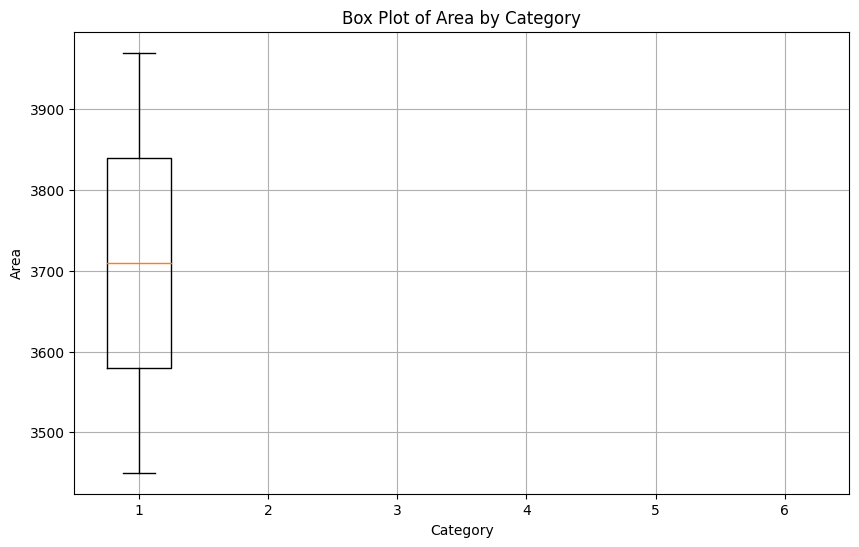

In [ ]:
grouped_data = encoded_data.groupby('bedrooms')['area'].apply(list).to_dict()

# Extract categories and values
categories = list(grouped_data.keys())
values = list(grouped_data.values())

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(values, labels=categories)
plt.xlabel('Category')
plt.ylabel('Area')
plt.title('Box Plot of Area by Category')
plt.grid(True)
plt.show()

In [ ]:
average_area_by_bedroom = encoded_data.groupby('bedrooms')['area'].mean()

# Print the results (Series object)
print(average_area_by_bedroom)

bedrooms
1    3710.000000
2    4576.360656
3    5194.884477
4    5597.825000
5    6457.222222
6    3600.000000
Name: area, dtype: float64


In [ ]:
encoded_data[encoded_data['bedrooms']==6]

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes,category_mapped,category_encoded
112,6083000,NaN,6,2,2,yes,no,no,no,0,furnished,1,0,1,0,1.5,1
395,3500000,3600.0,6,1,2,yes,no,no,no,1,unfurnished,1,0,1,0,1.5,1


In [ ]:
baseline_area =  3710  # Example baseline area (adjust as needed)

# Calculate percentage difference from baseline
percentage_difference = (average_area_by_bedroom - baseline_area) / baseline_area * 100

# Print the results (Series object)
print(percentage_difference)

bedrooms
1     0.000000
2    23.352039
3    40.023840
4    50.884771
5    74.049117
6    -2.964960
Name: area, dtype: float64


#### Observation

Without doing a t-test we can see the average area is significant as the bedroom size increase therefore we should be using the average area per bedroom category

In [ ]:
encoded_data['area'] = encoded_data['area'].fillna(average_area_by_bedroom)

In [ ]:
encoded_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes,category_mapped,category_encoded
1,12250000,8960.0,4,4,4,yes,no,no,yes,3,furnished,1,0,1,0,1.5,1
2,12250000,9960.0,3,2,2,yes,yes,no,no,2,furnished,1,0,0,1,1.5,1
3,12215000,7500.0,4,2,2,yes,yes,no,yes,3,furnished,1,0,0,1,1.5,1
4,11410000,7420.0,4,1,2,yes,yes,no,yes,2,furnished,0,1,1,0,1.5,1
5,10850000,7500.0,3,3,1,yes,yes,no,yes,2,furnished,1,0,0,1,1.5,1


## Encode Remaining variable with Label Encoder


In [ ]:
le = LabelEncoder()

# Iterate through columns and encode categorical columns
for col in encoded_data.columns:
  if encoded_data[col].dtype == 'object' or encoded_data[col].dtype == 'category':
    encoded_data[col] = le.fit_transform(encoded_data[col])

In [ ]:
encoded_data.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus,guestroom_no,guestroom_yes,prefarea_no,prefarea_yes,category_mapped,category_encoded
1,12250000,8960.0,4,4,4,1,0,0,1,3,0,1,0,1,0,1.5,1
2,12250000,9960.0,3,2,2,1,1,0,0,2,0,1,0,0,1,1.5,1


# Let's model

In [ ]:
X = encoded_data.drop(columns=['price'])  # Features
y = encoded_data['price']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

### Name all the models as a list

In [ ]:
names = ['Linear','Lasso','Ridge','Decision','Random Forest','MLP']

### Initialise all models

In [ ]:
Regressors =[
    LinearRegression(),
    Lasso(),
    Ridge(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor()
]

### Magic Function

In [ ]:
results = []
models = {}
for name, reg in zip(names, Regressors):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o reg.fit(X_train, y_train)

    print ('... predicting')
    y_pred = reg.predict(X_test)

    print ('... scoring')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)



    # save the results to dictionaries
    models[name] = reg

    results.append([name, mse, r2, run_time.best])

results = pd.DataFrame(results, columns=['Regressors', 'MSE', "R-Squared", 'Train Time'])
results.set_index('Regressors', inplace= True)

Fitting Linear model...
... predicting
... scoring
Fitting Lasso model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
Fitting Decision model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting MLP model...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

... predicting
... scoring


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
df = pd.DataFrame(results)
df = df.reset_index()
df.sort_values('R-Squared', ascending=False)

,Regressors,MSE,R-Squared,Train Time
0,Linear,8.723065e+11,0.761624,0.002793
1,Lasso,8.723081e+11,0.761623,0.002298
2,Ridge,8.737324e+11,0.761234,0.002037
4,Random Forest,9.809266e+11,0.731941,0.214074
3,Decision,1.420758e+12,0.611748,0.003306


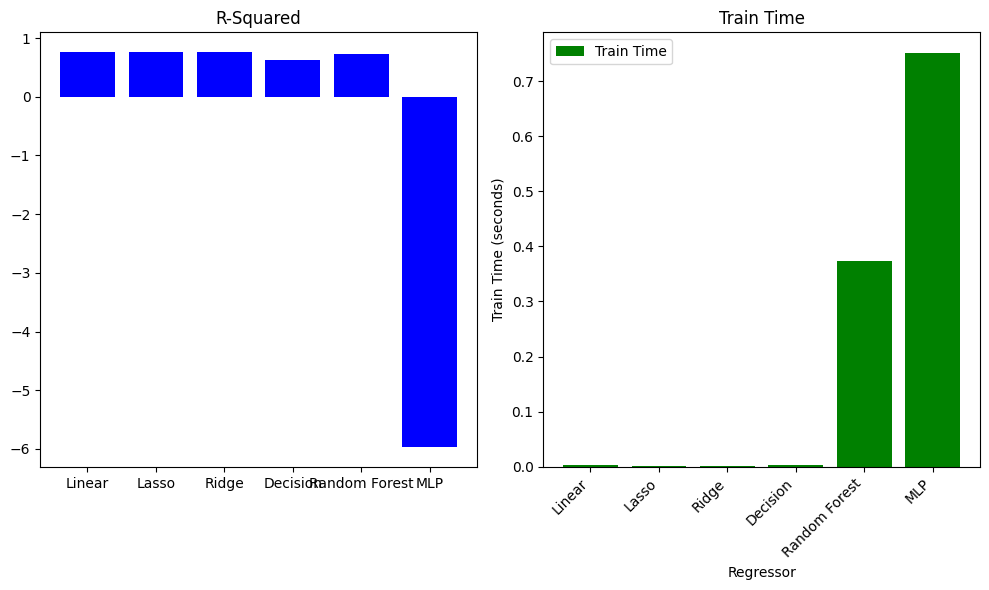

In [ ]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.bar(df['Regressors'], df['R-Squared'], color='blue', label='R-Squared')
ax2.bar(df['Regressors'], df['Train Time'], color='green', label='Train Time')

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('Regressor')
plt.ylabel('R-Squared')
ax1.set_title('R-Squared')

plt.ylabel('Train Time (seconds)')
ax2.set_title('Train Time')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df = df[df['Regressors'] != 'MLP']
df

,Regressors,MSE,R-Squared,Train Time
0,Linear,8.723065e+11,0.761624,0.002793
1,Lasso,8.723081e+11,0.761623,0.002298
2,Ridge,8.737324e+11,0.761234,0.002037
3,Decision,1.420758e+12,0.611748,0.003306
4,Random Forest,9.809266e+11,0.731941,0.214074


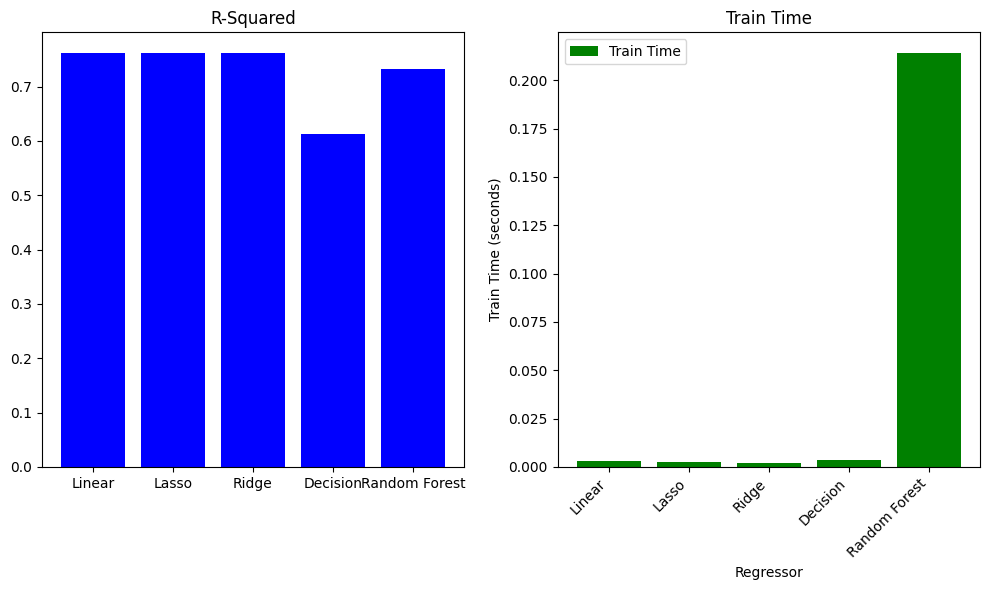

In [ ]:
plt.figure(figsize=(10, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.bar(df['Regressors'], df['R-Squared'], color='blue', label='R-Squared')
ax2.bar(df['Regressors'], df['Train Time'], color='green', label='Train Time')

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('Regressor')
plt.ylabel('R-Squared')
ax1.set_title('R-Squared')

plt.ylabel('Train Time (seconds)')
ax2.set_title('Train Time')
plt.legend()
plt.tight_layout()
plt.show()

## This was the baseline
* mse 1173790361911.6228
* R-Squared 0.5926486342834361

That is a 29% improvement in the model

## Webinar Outcomes
* How to deal with catergorical data
* Imputation using hypothesis testing